# Data Preparation for Anime

Готовим данные для использования на моделях. В планах провести масштабирование, замену пропущенных значений, кодирование категорических значений и преобразование текстовых значений в их числовое представление через Bag of Words.

## Import Data

In [1]:
import pandas as pd

In [2]:
anime_dataset = pd.read_csv('./datasets/anime_dataset/anime.csv')

## Familiarize with Data

Названия, жанры, выпущено, выходило, продюсеры, лицензеры, студии - столбцы с текстом.

Тип, длительность, рейтинг (возрастной) и источник - столбцы с категорическими значениями.

Здесь проще сказать какие значения не надо масштабировать - оценка и кол-во эпизодов.

In [7]:
anime_dataset.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Здесь ничего не надо делать, так как пропущенных значений нет. 

Хотелось бы сказать так, но они просто уже заменены на Unknown.

In [4]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

## Imputing Data

Перед тем, как проводить операции с данными, нужно очистить их от пропущенных значений.

In [5]:
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer

In [6]:
# все столбцы, которые назваются Score
scores = [i for i in anime_dataset.columns if i.split('-')[0] == 'Score']

In [7]:
anime_dataset[scores] = anime_dataset[scores].replace('Unknown', '0')

In [8]:
anime_dataset[scores] = anime_dataset[scores].astype('float64')

In [9]:
anime_dataset['Episodes'] = anime_dataset.Episodes.replace('Unknown', np.NaN)

In [10]:
anime_dataset['Ranked'] = anime_dataset.Ranked.replace('Unknown', np.NaN)

In [11]:
imputer = KNNImputer()

In [12]:
anime_dataset[['Episodes', 'Ranked']] = imputer.fit_transform(anime_dataset[['Episodes', 'Ranked']])

## Replace Categorical Values
Теперь нужно кодировать категорические значения. 

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
# так как нам не важно, каким значением будет число
# лишь бы оно было разное, выбираем самый простой кодировщик
encoder = OrdinalEncoder()

In [15]:
# кодируем, так как в них сравнительно мало уникальных значений
cat_cols = ['Type', 'Duration', 'Rating', 'Source', 'Studios',
            'Premiered', 'Episodes', 'Producers', 'Licensors']

In [16]:
anime_dataset[cat_cols] = encoder.fit_transform(anime_dataset[cat_cols])

In [17]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          17562 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  float64
 7   Episodes       17562 non-null  float64
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  float64
 10  Producers      17562 non-null  float64
 11  Licensors      17562 non-null  float64
 12  Studios        17562 non-null  float64
 13  Source         17562 non-null  float64
 14  Duration       17562 non-null  float64
 15  Rating         17562 non-null  float64
 16  Ranked         17562 non-null  float64
 17  Popularity     17562 non-null  int64  
 18  Member

## Converting Time Data into Different Columns

Все наборы данных содержат в себе необработанные столбцы с датой выхода того или иного объекта.

In [18]:
import DataPreparation as dp

In [19]:
# самый простой способ
cleared_date = anime_dataset.Aired.str.replace(',', '')

In [20]:
# regex=false, иначе питончик будет ругаться 
cleared_date = cleared_date.str.replace('?', 'Unknown', regex=False)

In [21]:
# ебаные to, наконец-то, удалены
cleared_date = cleared_date.str.replace('to', '')

In [22]:
# ссаный jupyter ещё не поддерживает 10 версию, поэтому здесь костыли
# вместо нормальных case/switch
replaced_date = []
for date in cleared_date:
    das = date.split()
    # с самого начала задумывалось, что затем строки будут
    # переводиться в числа и так будет проверяться пропущенность значений.
    # Все так и было. Инфа сотка.
    for i in range(len(das)):
        if das[i] == 'Jan':
            date = date.replace(das[i], '01')
        if das[i] == 'Feb':
            date = date.replace(das[i], '02')
        if das[i] == 'Mar':
            date = date.replace(das[i], '03')
        if das[i] == 'Apr':
            date = date.replace(das[i], '04')
        if das[i] == 'May':
            date = date.replace(das[i], '05')
        if das[i] == 'Jun':
            date = date.replace(das[i], '06')
        if das[i] == 'Jul':
            date = date.replace(das[i], '07')
        if das[i] == 'Aug':
            date = date.replace(das[i], '08')
        if das[i] == 'Sep':
            date = date.replace(das[i], '09')
        if das[i] == 'Oct':
            date = date.replace(das[i], '10')
        if das[i] == 'Nov':
            date = date.replace(das[i], '11')
        if das[i] == 'Dec':
            date = date.replace(das[i], '12')
    replaced_date.append(date)

In [23]:
# надо же как-то все это разделить
replaced_date = pd.Series(replaced_date).str.split()

In [24]:
cols = ['release_month', 'release_day', 'release_year', 'end_month', 'end_day', 'end_year']

In [25]:
date_cols = dp.date_to_cols(replaced_date, cols=cols)

In [26]:
anime_dataset[cols] = date_cols

Как мне кажется, от японского названия нет толку, поэтому просто удалим его.

In [27]:
del anime_dataset['Japanese name']

In [28]:
del anime_dataset['Aired']

In [29]:
anime_dataset.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Premiered,Producers,Licensors,...,Score-4,Score-3,Score-2,Score-1,release_month,release_day,release_year,end_month,end_day,end_year
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,5.0,86.0,93.0,498.0,100.0,...,3184.0,1357.0,741.0,1580.0,4,3,1998,4,24,1999
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,0.0,0.0,171.0,2934.0,200.0,...,577.0,221.0,109.0,379.0,9,1,2001,1,26,2006
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,5.0,86.0,93.0,3605.0,109.0,...,1965.0,664.0,316.0,533.0,4,1,1998,9,30,1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,5.0,86.0,151.0,3126.0,100.0,...,1083.0,353.0,164.0,131.0,7,2,2002,12,24,2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,5.0,127.0,40.0,3138.0,208.0,...,265.0,83.0,50.0,27.0,9,30,2004,9,29,2005


да, из-за того, что были добавлены рандомные значения, теперь в наборе шумы,

да, можно было бы на основе вышедших серий просчитать когда аниме вышло,

зато теперь все столбцы с датами обработаны.

### Implement Bag of Words on Dataset

Разделение для того, чтобы, ну кто знает этих людей, вдруг кому-то придет в голову кинуть название на английском языке. А шо.

In [8]:
ids = anime_dataset.index
jap_names = anime_dataset.Name
en_names = anime_dataset['English name']

In [9]:
an_id_name_dict_jap = dict(zip(ids, jap_names))
an_id_name_dict_en = dict(zip(ids, en_names))
an_name_id_dict_jap = dict(zip(jap_names, ids))
an_name_id_dict_en = dict(zip(en_names, ids))

In [32]:
del anime_dataset['MAL_ID']
del anime_dataset['Name']

In [33]:
text_cols = ['Genres', 'English name']

In [34]:
anime_dataset['text_features'] = dp.get_text_features(anime_dataset, text_cols)

In [35]:
anime_matrix = dp.text_to_nums.fit_transform(anime_dataset['text_features'])

[Pipeline] ..... (step 1 of 2) Processing TextToCounter, total= 7.5min
[Pipeline] .. (step 2 of 2) Processing CounterToFeature, total=   0.1s


In [36]:
del anime_dataset['text_features']
del anime_dataset['Genres']
del anime_dataset['English name']

## Simple Data Visualization

Все, кроме индекса, под нормализацию.

array([[<AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Episodes'}>,
        <AxesSubplot:title={'center':'Premiered'}>,
        <AxesSubplot:title={'center':'Producers'}>,
        <AxesSubplot:title={'center':'Licensors'}>],
       [<AxesSubplot:title={'center':'Studios'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Ranked'}>,
        <AxesSubplot:title={'center':'Popularity'}>],
       [<AxesSubplot:title={'center':'Members'}>,
        <AxesSubplot:title={'center':'Favorites'}>,
        <AxesSubplot:title={'center':'Watching'}>,
        <AxesSubplot:title={'center':'Completed'}>,
        <AxesSubplot:title={'center':'On-Hold'}>,
        <AxesSubplot:title={'center':'Dropped'}>],
       [<AxesSubplot:title={'center':'Plan to Watch'}>,
        <AxesSubplot:title={'cent

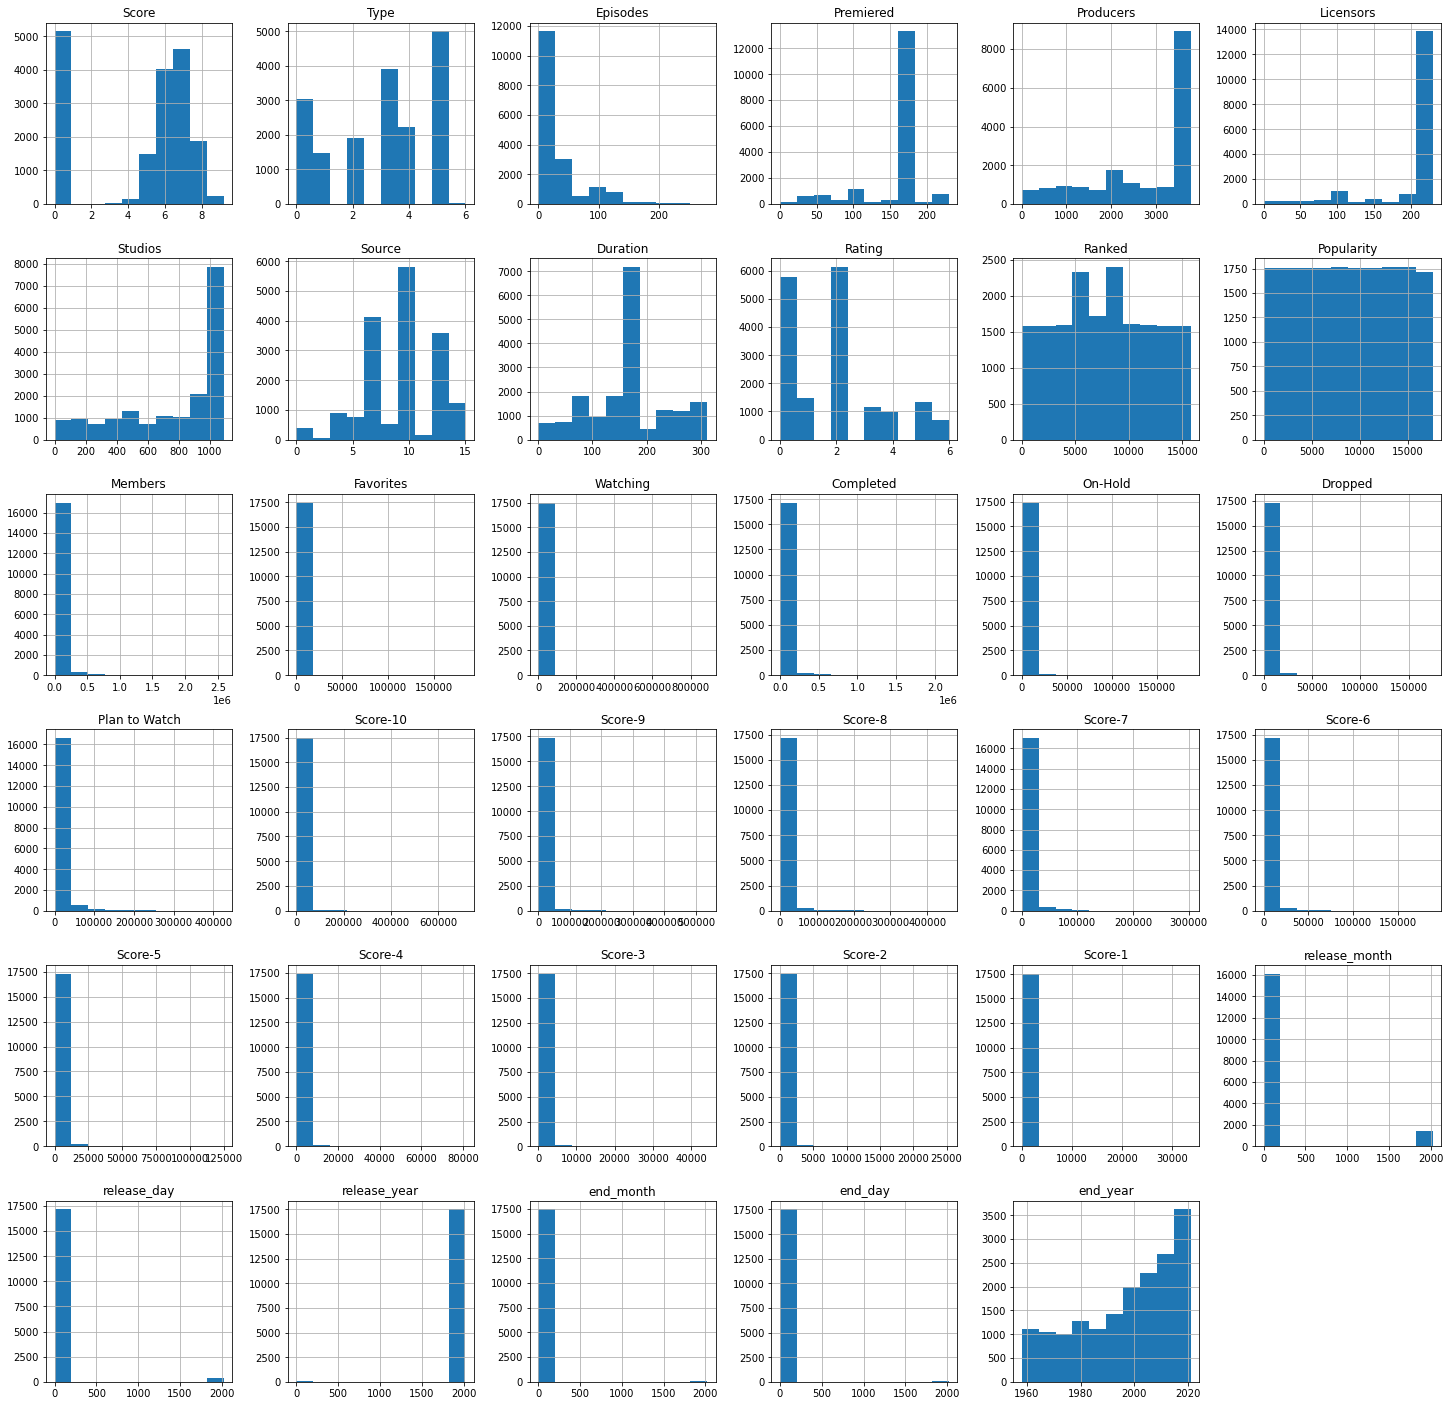

In [37]:
anime_dataset.hist(figsize=(25, 25))

## Data Normalization

Функция implement_scalar просто применяет нормализацию, выделяя только численные столбцы. Так как, на данный момент, они у нас все численные, то это бессмысленно.

In [38]:
scaled_nums, cols = dp.implement_scalar(anime_dataset)

In [39]:
anime_dataset[cols] = scaled_nums

In [40]:
anime_dataset.head()

,Score,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,...,Score-4,Score-3,Score-2,Score-1,release_month,release_day,release_year,end_month,end_day,end_year
0,0.955386,0.833333,0.307143,0.404348,0.131676,0.434783,0.804408,0.6,0.519231,0.500000,...,0.039234,0.030699,0.029207,0.046815,0.001978,0.001484,0.988125,0.001979,0.011875,0.650794
1,0.912949,0.000000,0.000000,0.743478,0.775780,0.869565,0.130395,0.6,0.208333,0.500000,...,0.007110,0.005000,0.004296,0.011230,0.004451,0.000495,0.989609,0.000495,0.012865,0.761905
2,0.896627,0.833333,0.307143,0.404348,0.953199,0.473913,0.426079,0.4,0.519231,0.333333,...,0.024213,0.015021,0.012455,0.015793,0.001978,0.000495,0.988125,0.004453,0.014844,0.634921
3,0.791077,0.833333,0.307143,0.656522,0.826547,0.434783,0.804408,0.6,0.532051,0.333333,...,0.013345,0.007986,0.006464,0.003881,0.003462,0.000990,0.990104,0.005938,0.011875,0.698413
4,0.759521,0.833333,0.453571,0.173913,0.829720,0.904348,0.887971,0.4,0.506410,0.166667,...,0.003265,0.001878,0.001971,0.000800,0.004451,0.014844,0.991094,0.004453,0.014349,0.746032


# Getting Recommendations

После нормализации данных, рекомендации улучшились. Если раньше, когда запрашиваешь похожие на Bakemonogatari, на первом месте был Vampire Knight, то сейчас - то, что нужно - второй сезон гатарей.

In [16]:
import GiveRecommendations as gs

In [14]:
anime_matrix = pd.read_csv('./datasets/anime_dataset/anime_text_matrix.csv')

In [17]:
#anime_num_matrix = anime_dataset.to_numpy()
anime_num_matrix = pd.read_csv('./datasets/anime_dataset/anime_num_matrix.csv')

In [18]:
full_cs = gs.get_cosine_sim(anime_matrix, anime_num_matrix)

In [27]:
similaries = gs.get_similar(full_cs, 'Bakemonogatari', an_id_name_dict_jap, an_name_id_dict_jap)

In [28]:
similaries

['Monogatari Series: Second Season',
 'Shiki',
 'Bakemonogatari Recap',
 'xxxHOLiC Rou',
 'Blood-C',
 'Nisemonogatari',
 'Fortune Arterial: Akai Yakusoku']

In [46]:
#anime_text_matrix = pd.DataFrame(anime_matrix.toarray())

In [47]:
#anime_text_matrix.to_csv('C:/Users/ASDW/Python/Projects/Recosys 2.0/datasets/anime_dataset/anime_text_matrix.csv')

In [48]:
#anime_dataset.to_csv('C:/Users/ASDW/Python/Projects/Recosys 2.0/datasets/anime_dataset/anime_num_matrix.csv')